# 🎯 Goal
## **Reduce Cost per Acquisition (CPA) by 15% across active campaigns in the next quarter while maintaining or increasing total conversions.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as ss
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
import scipy as s
df = pd.read_csv(r"C:\working office\marketing_campaign_data_messy.csv", encoding='latin1')

In [2]:
df.head(33)

,Campaign_ID,Campaign_Name,Start_Date,End_Date,Channel,Impressions,Clicks,Spend,Conversions,Active,Clicks,Campaign_Tag
0,CMP-00001,Q4_Summer_CMP-00001,2023-11-24 00:00:00,2023-12-13,TikTok,16795,197,$102.82,20.0,Y,NaN,TI
1,CMP-00002,Q1_Launch_CMP-00002,2023-05-06 00:00:00,2023-05-12,Facebook,1860,30,24.33,1.0,0,NaN,FA
2,CMP-00003,Q3_Winter_CMP-00003,2023-12-13 00:00:00,2023-12-20,Email,77820,843,1323.39,51.0,No,NaN,EM
3,CMP-00004,Q1_BlackFriday_CMP-00004,2023-10-30,2023-11-03,TikTok,55886,2019,2180.38,135.0,True,NaN,TI
4,CMP-00005,Q2_Winter_CMP-00005,2023-04-22 00:00:00,2023-04-23,Facebook,7265,169,252.44,30.0,Yes,NaN,FA
5,CMP-00006,Q4_BlackFriday_CMP-00006,2023-10-15 00:00:00,2023-10-28,Instagram,83386,2643,2697.03,NaN,1,NaN,IN
6,CMP-00007,Q3_Launch_CMP-00007,2023-10-07 00:00:00,2023-10-23,Facebook,38194,1135,1232.76,178.0,Yes,NaN,FA
7,CMP-00008,Q4_Launch_CMP-00008,2023-05-23,2023-05-28,Instagram,88498,1173,865.7,127.0,1,NaN,IN
8,CMP-00009,Q4_BlackFriday_CMP-00009,2023-03-23 00:00:00,2023-04-01,Google Ads,45131,1179,1046.18,104.0,1,NaN,GO
9,CMP-00010,Q2_Winter_CMP-00010,2023-03-21 00:00:00,2023-04-01,Email,61263,1153,1623.56,NaN,0,NaN,EM


### 2. **Data Preparation**

In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")
df["spend"] = df["spend"].replace(r'[^0-9\.]', '', regex=True).fillna('0').astype(float)
df["active"] = df["active"].replace({"Y":"Yes","True":"Yes","1":"Yes","0":"No","False":"No"})
df["channel"] = df["channel"].replace({"Tik_Tok":"TikTok","Facebok":"Facebook","E-mail":"Email","Insta_gram":"Instagram","Gogle":"Google_Ads","Google Ads":"Google_Ads"})

In [4]:
df["campaign_name"] = df["campaign_name"].str.split("_").str[1]


In [5]:
df.drop(columns =["campaign_tag","campaign_id"],inplace = True)

In [6]:
df = df.iloc[:,:-1]

In [7]:
df["start_date"] = pd.to_datetime(df["start_date"], errors="coerce",dayfirst=True,infer_datetime_format=True)
df["end_date"] = pd.to_datetime(df["end_date"])
 


C:\Users\aryam\AppData\Local\Temp\ipykernel_24868\1745059455.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["start_date"] = pd.to_datetime(df["start_date"], errors="coerce",dayfirst=True,infer_datetime_format=True)
C:\Users\aryam\AppData\Local\Temp\ipykernel_24868\1745059455.py:1: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["start_date"] = pd.to_datetime(df["start_date"], errors="coerce",dayfirst=True,infer_datetime_format=True)


In [8]:
#checking for invalid date 
df[df["end_date"]<df["start_date"]].shape #out of 2020 rows, 34 have invalid dates. Since this is less than 3%, it’s safe to remove them.

(34, 9)

In [9]:
df = df[df["end_date"]>df["start_date"]]

In [10]:
df.isnull().sum()

campaign_name      0
start_date         0
end_date           0
channel           84
impressions        0
clicks             0
spend              0
conversions      167
active             0
dtype: int64

- For business reporting → we keep NaN or mark as "Missing" or 0 .
- For ML modeling → we impute with 0 or median, but add a missingness flag.
- For decision-making → investigate why those 167 rows are missing (data pipeline issue? campaign not tracked?).

our  goal is business reporting so we keep NaN as 0.


In [11]:
df["conversions"] = df["conversions"].fillna(0)

In [12]:
df["channel"] = df["channel"].fillna("other")

In [13]:
df.describe()

,start_date,end_date,impressions,clicks,spend,conversions
count,1653,1653,1653.000000,1653.000000,1653.000000,1653.000000
mean,2023-07-08 09:20:08.711433728,2023-07-23 20:25:41.923774720,49517.956443,1501.453721,3085.025221,169.008469
min,2023-01-01 00:00:00,2023-01-05 00:00:00,1055.000000,11.000000,10.010000,0.000000
25%,2023-04-12 00:00:00,2023-04-27 00:00:00,25214.000000,653.000000,658.250000,41.000000
50%,2023-07-08 00:00:00,2023-07-22 00:00:00,49302.000000,1244.000000,1443.700000,126.000000
75%,2023-10-09 00:00:00,2023-10-23 00:00:00,74506.000000,2204.000000,2615.510000,245.000000
max,2024-01-01 00:00:00,2024-01-30 00:00:00,99875.000000,4812.000000,500000.000000,943.000000
std,NaN,NaN,28445.025447,1093.077428,24533.176606,164.403423


<Axes: >

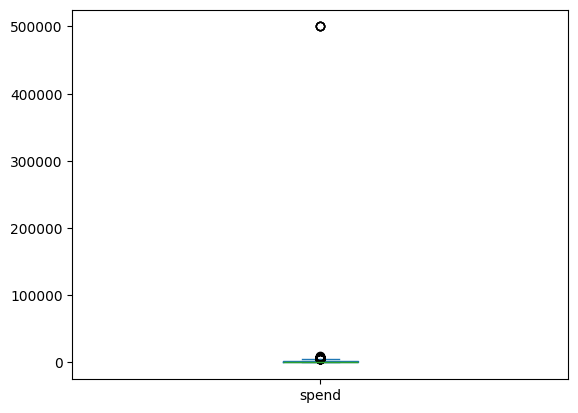

In [14]:
df["spend"].plot(kind="box")

In [15]:
df["spend"].sort_values(ascending = False)

1460    500000.00
789     500000.00
1754    500000.00
1718    500000.00
1443      8921.51
          ...    
796         19.24
366         17.84
1470        17.35
1024        15.68
1075        10.01
Name: spend, Length: 1653, dtype: float64

In [16]:
df = df[df["spend"]<10000]

In [17]:
df = df.drop_duplicates()

In [18]:
df.head(33)

,campaign_name,start_date,end_date,channel,impressions,clicks,spend,conversions,active
0,Summer,2023-11-24,2023-12-13,TikTok,16795,197,102.82,20.0,Yes
1,Launch,2023-05-06,2023-05-12,Facebook,1860,30,24.33,1.0,No
2,Winter,2023-12-13,2023-12-20,Email,77820,843,1323.39,51.0,No
4,Winter,2023-04-22,2023-04-23,Facebook,7265,169,252.44,30.0,Yes
5,BlackFriday,2023-10-15,2023-10-28,Instagram,83386,2643,2697.03,0.0,Yes
6,Launch,2023-10-07,2023-10-23,Facebook,38194,1135,1232.76,178.0,Yes
8,BlackFriday,2023-03-23,2023-04-01,Google_Ads,45131,1179,1046.18,104.0,Yes
9,Winter,2023-03-21,2023-04-01,Email,61263,1153,1623.56,0.0,No
11,Launch,2023-02-19,2023-02-20,Google_Ads,42090,763,1267.69,109.0,No
12,Launch,2023-05-16,2023-06-01,Google_Ads,68221,2975,5292.16,567.0,No


In [19]:
df.to_csv("campaign_data.csv", index=False)

### 2. **EDA**

<Axes: >

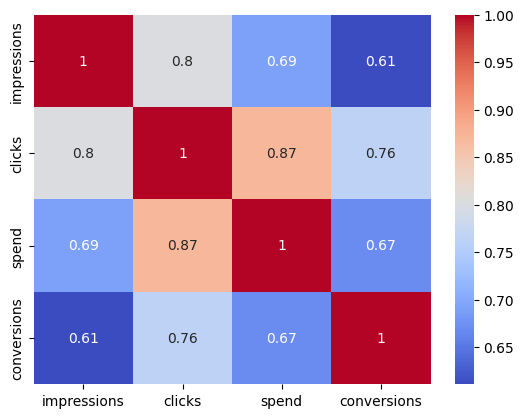

In [20]:
ss.heatmap(df.select_dtypes(include = "number").corr(), annot=True, cmap="coolwarm")

In [21]:
df["active"].value_counts()

active
Yes    966
No     664
Name: count, dtype: int64

<Axes: xlabel='channel'>

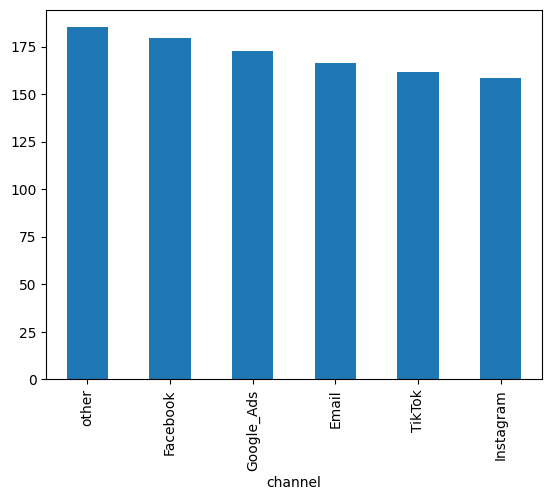

In [22]:
df.groupby(["channel"])["conversions"].mean().sort_values(ascending = False).plot(kind="bar")

<Axes: title={'center': 'Average Conversions by Campaign Name'}, xlabel='campaign_name'>

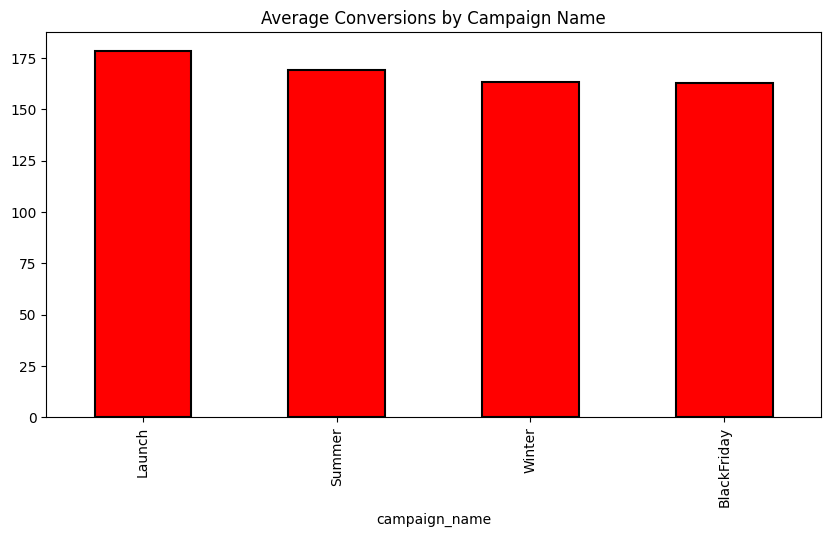

In [23]:
df.groupby(["campaign_name"])["conversions"].mean().sort_values(ascending = False).plot(kind="bar",figsize = (10,5),color = "red",edgecolor = "black", linewidth = 1.5,title = "Average Conversions by Campaign Name")

<Axes: title={'center': 'Average Impressions by Campaign Name'}, xlabel='campaign_name'>

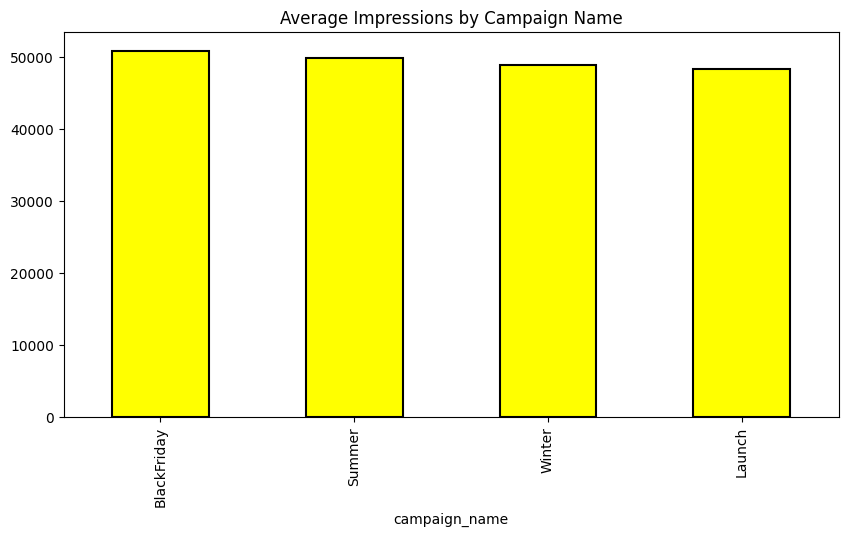

In [24]:
df.groupby(["campaign_name"])["impressions"].mean().sort_values(ascending = False).plot(kind="bar",figsize = (10,5),color = "yellow",edgecolor = "black", linewidth = 1.5,title = "Average Impressions by Campaign Name")

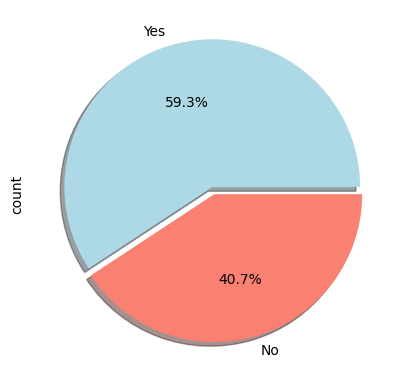

In [25]:
df["active"].value_counts().plot(kind="pie",autopct = "%1.1f%%",colors = ["lightblue","salmon"],explode = [0.05,0],shadow = True)
plt.show()

In [26]:
df["CTR"] = df["clicks"]/df["impressions"]*100

In [27]:
df["CPA"] = df["spend"]/df["conversions"]
df["CPC"] = df["spend"]/df["clicks"]

In [28]:
df.head(2)

,campaign_name,start_date,end_date,channel,impressions,clicks,spend,conversions,active,CTR,CPA,CPC
0,Summer,2023-11-24,2023-12-13,TikTok,16795,197,102.82,20.0,Yes,1.172968,5.141,0.521929
1,Launch,2023-05-06,2023-05-12,Facebook,1860,30,24.33,1.0,No,1.612903,24.330,0.811000


In [29]:
df["conversions_rate"] = df["conversions"]/df["clicks"]*100

In [30]:
df.head()

,campaign_name,start_date,end_date,channel,impressions,clicks,spend,conversions,active,CTR,CPA,CPC,conversions_rate
0,Summer,2023-11-24,2023-12-13,TikTok,16795,197,102.82,20.0,Yes,1.172968,5.141000,0.521929,10.152284
1,Launch,2023-05-06,2023-05-12,Facebook,1860,30,24.33,1.0,No,1.612903,24.330000,0.811000,3.333333
2,Winter,2023-12-13,2023-12-20,Email,77820,843,1323.39,51.0,No,1.083269,25.948824,1.569858,6.049822
4,Winter,2023-04-22,2023-04-23,Facebook,7265,169,252.44,30.0,Yes,2.326222,8.414667,1.493728,17.751479
5,BlackFriday,2023-10-15,2023-10-28,Instagram,83386,2643,2697.03,0.0,Yes,3.169597,inf,1.020443,0.000000


## Red Flags

In [31]:
redflags = df[(df["CTR"]>10) | (df["CPA"]>100) | (df["CPC"]>50) | (df["conversions_rate"]>50)]

In [32]:

df[df["conversions"]<1][["campaign_name","channel","spend","impressions","clicks","conversions"]].sort_values(by="spend",ascending = False)

,campaign_name,channel,spend,impressions,clicks,conversions
1358,BlackFriday,TikTok,8267.84,86514,4148,0.0
189,Summer,Facebook,7777.24,95856,4618,0.0
1752,BlackFriday,Facebook,7198.14,93124,4429,0.0
666,BlackFriday,Facebook,6846.20,89092,4178,0.0
1424,Winter,Instagram,6613.09,90563,3839,0.0
...,...,...,...,...,...,...
1138,Launch,Email,52.70,6408,102,0.0
164,Summer,Instagram,33.91,3693,39,0.0
1853,Launch,other,20.43,2980,30,0.0
1215,BlackFriday,TikTok,19.31,2645,37,0.0


<Axes: title={'center': 'Spend vs Impressions for Campaigns with Zero Conversions'}, xlabel='spend', ylabel='impressions'>

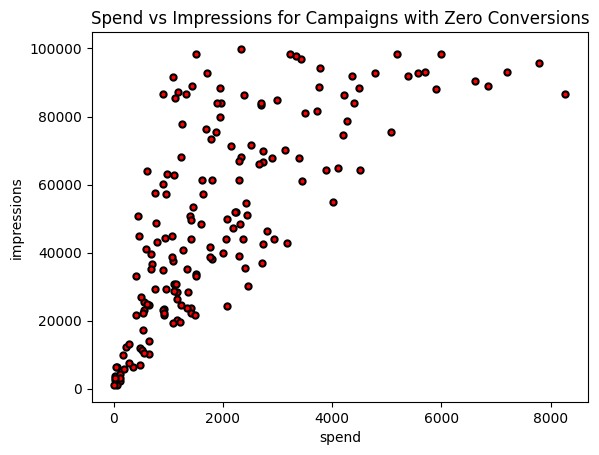

In [33]:
df[df["conversions"] == 0].plot(kind="scatter",x="spend",y="impressions",color = "red",edgecolor = "black", linewidth = 1.5,title = "Spend vs Impressions for Campaigns with Zero Conversions")

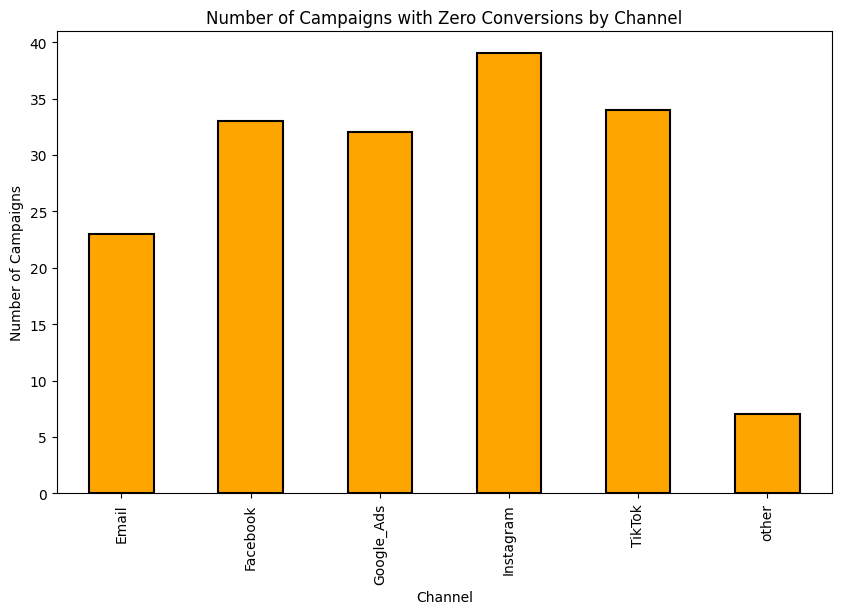

In [34]:
import matplotlib.pyplot as plt

conversion_zero = df["conversions"] == 0


zero_conv_counts = conversion_zero.groupby(df["channel"]).sum()

zero_conv_counts.plot(
    kind="bar",
    color="orange",
    edgecolor="black",
    linewidth=1.5,
    title="Number of Campaigns with Zero Conversions by Channel",
    figsize=(10,6)
)

plt.ylabel("Number of Campaigns")
plt.xlabel("Channel")
plt.show()

## 🚨 Red Flag Campaigns  

Some campaigns spent a lot of money, got thousands of impressions and clicks, but **zero conversions**.  

### Examples
- **BlackFriday (TikTok)** → 86,514 impressions, 4,148 clicks, **0 conversions**  
- **Summer (Facebook)** → 95,856 impressions, 4,618 clicks, **0 conversions**  
- **Winter (Instagram)** → 90,563 impressions, 3,839 clicks, **0 conversions**  



### Why This Is a Problem
- **Money wasted**: Spend is high, but no results.  
- **CPA is infinite**: Cost per acquisition can’t be calculated because there are no conversions.  
- **Business risk**: These campaigns look good on the surface (lots of clicks), but they don’t bring any value.  


### What Might Be Wrong
- Landing page not working or not convincing.  
- Offer doesn’t match what people expect.  
- Tracking issue (maybe conversions weren’t recorded).  


📌 *In short: these campaigns are burning money without results. Spotting and fixing them is key to reducing CPA and improving ROI.*  





###  **Analysis & Insights**
- Which campaigns are already below target?   
- Which campaigns are above target?  
- Which channels consistently perform better?
- Look at CTR and Conversion Rate to diagnose whether the issue is *ad engagement* or *conversion funnel*.

<Axes: title={'center': 'Number of Campaigns with CPA Below $10 by Channel'}, xlabel='channel'>

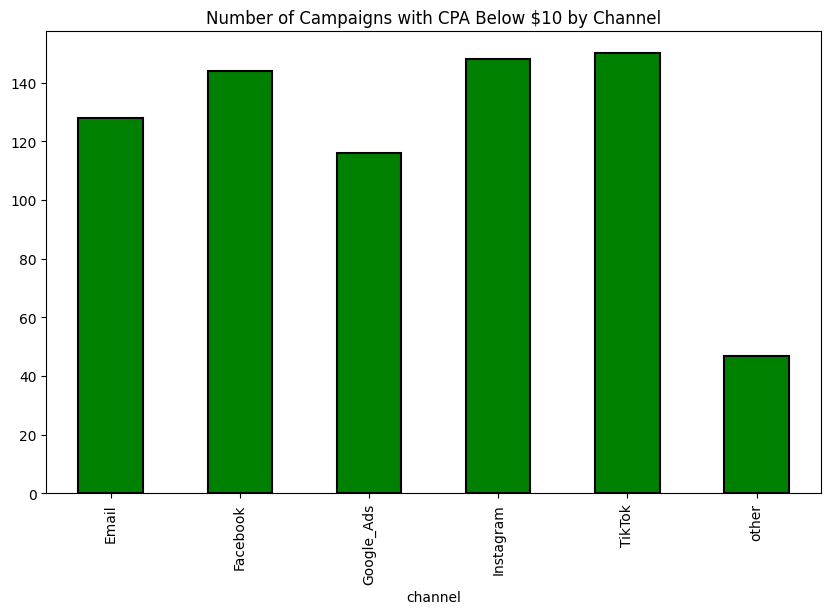

In [35]:
below = df["CPA"]<10
below_counts = below.groupby(df["channel"]).sum()
below_counts.plot(
    kind="bar",
    color="green",
    edgecolor="black",
    linewidth=1.5,
    title="Number of Campaigns with CPA Below $10 by Channel",
    figsize=(10,6)
)

<Axes: title={'center': 'Number of Campaigns with CPA Below $10 by Channel'}, xlabel='campaign_name'>

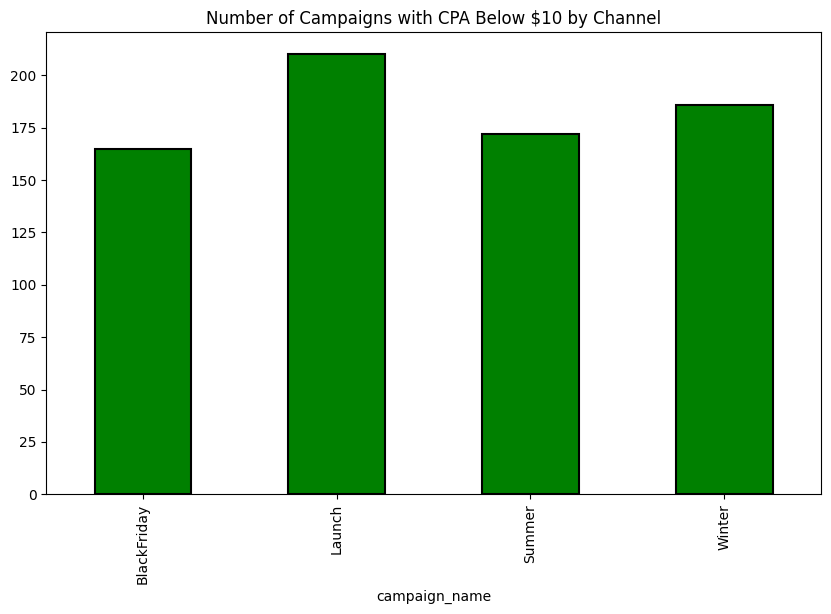

In [36]:
below = df["CPA"]<10
below_counts = below.groupby(df["campaign_name"]).sum()
below_counts.plot(
    kind="bar",
    color="green",
    edgecolor="black",
    linewidth=1.5,
    title="Number of Campaigns with CPA Below $10 by Channel",
    figsize=(10,6)
)

<Axes: title={'center': 'Number of Campaigns with CPA Below $10 by Channel'}, xlabel='campaign_name'>

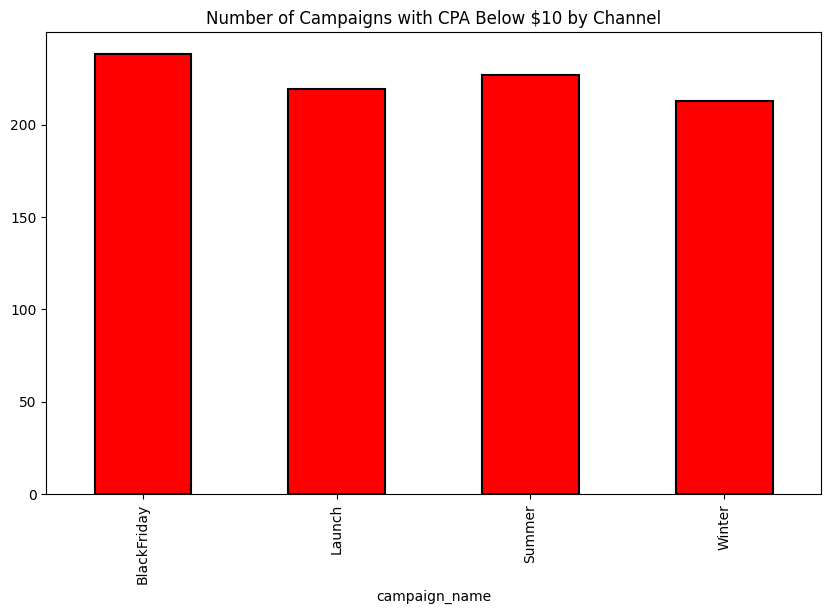

In [37]:
below = df["CPA"]>10
below_counts = below.groupby(df["campaign_name"]).sum()
below_counts.plot(kind="bar",color="red",edgecolor="black",linewidth=1.5,title="Number of Campaigns with CPA Below $10 by Channel",figsize=(10,6))

<Axes: title={'center': 'Number of Campaigns with CPA Below $10 by Channel'}, xlabel='channel'>

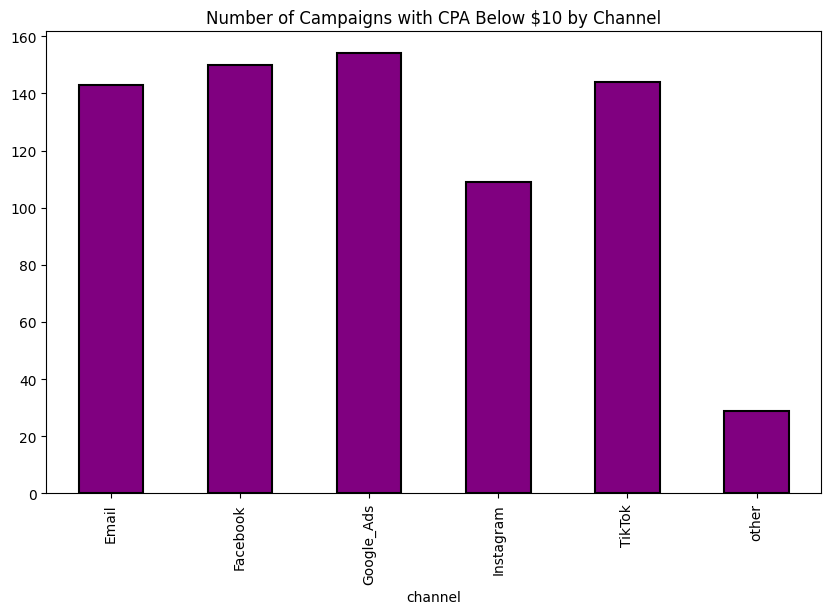

In [42]:
below = df["CPA"]>10
below_counts = below.groupby(df["channel"]).sum()
below_counts.plot(
    kind="bar",
    color="purple",
    edgecolor="black",
    linewidth=1.5,
    title="Number of Campaigns with CPA Below $10 by Channel",
    figsize=(10,6))

###  **Baseline Measurement**
- Calculate current average CPA across active campaigns.  


In [39]:
df = df[df["conversions"]>0]

In [40]:
df.describe()

,start_date,end_date,impressions,clicks,spend,conversions,CTR,CPA,CPC,conversions_rate
count,1462,1462,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,2023-07-07 15:43:35.047879680,2023-07-23 03:01:13.871408896,49320.387825,1491.151163,1865.204596,188.097127,2.999472,11.608912,1.241482,12.403730
min,2023-01-01 00:00:00,2023-01-05 00:00:00,1055.000000,16.000000,10.010000,1.000000,0.983975,2.616447,0.500278,3.333333
25%,2023-04-10 00:00:00,2023-04-26 06:00:00,24959.250000,637.500000,647.440000,67.000000,2.009293,6.932917,0.869468,8.811476
50%,2023-07-07 00:00:00,2023-07-22 00:00:00,49328.000000,1230.000000,1425.910000,143.000000,3.004174,9.986011,1.259763,12.473963
75%,2023-10-09 00:00:00,2023-10-23 00:00:00,73913.750000,2203.750000,2594.665000,258.000000,3.996155,14.525825,1.618618,16.052324
max,2024-01-01 00:00:00,2024-01-28 00:00:00,99818.000000,4812.000000,8921.510000,943.000000,4.997159,41.744444,1.996443,19.972640
std,NaN,NaN,28436.472078,1093.242189,1593.847787,163.250756,1.148841,6.600604,0.431328,4.331530


📊 **What the Numbers Say (in simple words)**  
- **Impressions**: On average, each campaign reached about **49,000 people** → good visibility.  
- **Clicks**: Around **1,500 clicks per campaign** → people are interested and engaging.  
- **Conversions**: Only about **188 per campaign** → this is much lower compared to clicks.  
- **CTR (Click-Through Rate)**: About **3%** → decent, people do click.  
- **Conversion Rate**: About **12%** → okay, but not strong.  
- **CPA (Cost per Acquisition)**: Around **11.6** → higher than the target (~9.8), so not efficient enough.  
- **Variation**: Some campaigns are very cheap (CPA ~2.6), while others are very expensive (CPA ~41.7).  

👉 In short: campaigns are **good at getting attention**, but **not great at turning that attention into sales**. The costs are also **uneven**, with some campaigns performing well and others wasting money.  



In [41]:
df.head()

,campaign_name,start_date,end_date,channel,impressions,clicks,spend,conversions,active,CTR,CPA,CPC,conversions_rate
0,Summer,2023-11-24,2023-12-13,TikTok,16795,197,102.82,20.0,Yes,1.172968,5.141000,0.521929,10.152284
1,Launch,2023-05-06,2023-05-12,Facebook,1860,30,24.33,1.0,No,1.612903,24.330000,0.811000,3.333333
2,Winter,2023-12-13,2023-12-20,Email,77820,843,1323.39,51.0,No,1.083269,25.948824,1.569858,6.049822
4,Winter,2023-04-22,2023-04-23,Facebook,7265,169,252.44,30.0,Yes,2.326222,8.414667,1.493728,17.751479
6,Launch,2023-10-07,2023-10-23,Facebook,38194,1135,1232.76,178.0,Yes,2.971671,6.925618,1.086132,15.682819



## 🏁 Conclusion  

Overall, the campaigns are **good at reaching people and driving clicks**, but they struggle to turn that attention into actual sales. The average CPA is still above the target, and some campaigns are wasting money with zero conversions.  

By **pausing or fixing red-flag campaigns**, **reallocating budget to efficient ones**, and **improving the conversion funnel**, it is realistic to reduce CPA by 15% in the next quarter while keeping conversions stable.  

👉 In short: **cut the waste, focus on winners, and fix the funnel** — this is the path to better ROI and stronger campaign performance.  


